<a href="https://colab.research.google.com/github/jacobmillerforever/ECON_537/blob/main/jbm_537_pset_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')
#for someone else to run this they would need GDPC1.csv saved in a folder on their google drive called 537_Homework
import pandas as pd
gdp_raw = pd.read_csv('/content/drive/MyDrive/537_Homework/GDPC1.csv')
treasury_raw = pd.read_csv('/content/drive/MyDrive/537_Homework/DGS10.csv')

print(gdp_raw.head())
print(treasury_raw.head())

Mounted at /content/drive
  observation_date     GDPC1
0       1947-01-01  2182.681
1       1947-04-01  2176.892
2       1947-07-01  2172.432
3       1947-10-01  2206.452
4       1948-01-01  2239.682
  observation_date  DGS10
0       1962-01-02   4.06
1       1962-01-03   4.03
2       1962-01-04   3.99
3       1962-01-05   4.02
4       1962-01-08   4.03


# **Question 2**

2A

In [4]:
import numpy as np
gdp_log = gdp_raw.copy()
gdp_log['observation_date'] = pd.to_datetime(gdp_log['observation_date'])
gdp_log['GDPC1_log'] = np.log(gdp_log['GDPC1'])
gdp_log = gdp_log[['observation_date', 'GDPC1_log']]
print(gdp_log.head())
print(gdp_log.tail())

  observation_date  GDPC1_log
0       1947-01-01   7.688309
1       1947-04-01   7.685653
2       1947-07-01   7.683603
3       1947-10-01   7.699141
4       1948-01-01   7.714089
    observation_date  GDPC1_log
307       2023-10-01  10.041535
308       2024-01-01  10.045575
309       2024-04-01  10.052937
310       2024-07-01  10.060504
311       2024-10-01  10.066070


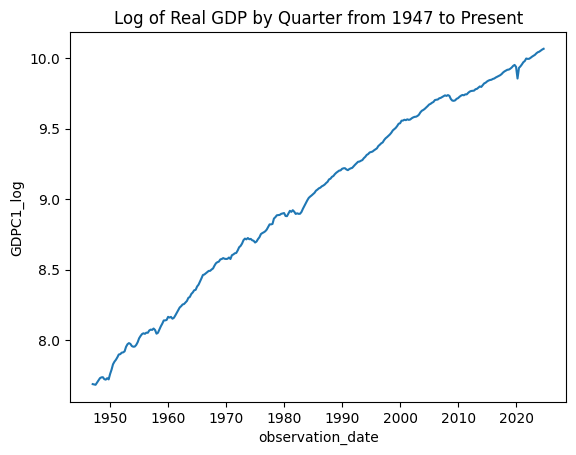

In [5]:
import matplotlib.pyplot as plt

plt.plot(gdp_log['observation_date'], gdp_log['GDPC1_log'])
plt.xlabel('observation_date')
plt.ylabel('GDPC1_log')
plt.title('Log of Real GDP by Quarter from 1947 to Present')
plt.show()


In [6]:
gamma_0 = np.var(gdp_log['GDPC1_log'], ddof=0)
print(gamma_0)
gamma_1 = gdp_log['GDPC1_log'].dropna().cov(gdp_log['GDPC1_log'].shift(1).dropna())
print(gamma_1)
auto_corr_1 = gamma_1/gamma_0
print(auto_corr_1)

0.4830619944839768
0.481488078598525
0.9967417931788795


In [7]:
acf_data = {'lag': [], 'auto_corr': []}

for lag in range(1, 41):
    gamma_k = gdp_log['GDPC1_log'].dropna().cov(gdp_log['GDPC1_log'].shift(lag).dropna())
    auto_corr_k = gamma_k / gamma_0
    acf_data['lag'].append(lag)
    acf_data['auto_corr'].append(auto_corr_k)

acf_df = pd.DataFrame(acf_data)

print(acf_df.head())
print(acf_df.tail())

   lag  auto_corr
0    1   0.996742
1    2   0.990147
2    3   0.983454
3    4   0.976846
4    5   0.970310
    lag  auto_corr
35   36   0.787521
36   37   0.782036
37   38   0.776537
38   39   0.770969
39   40   0.765509


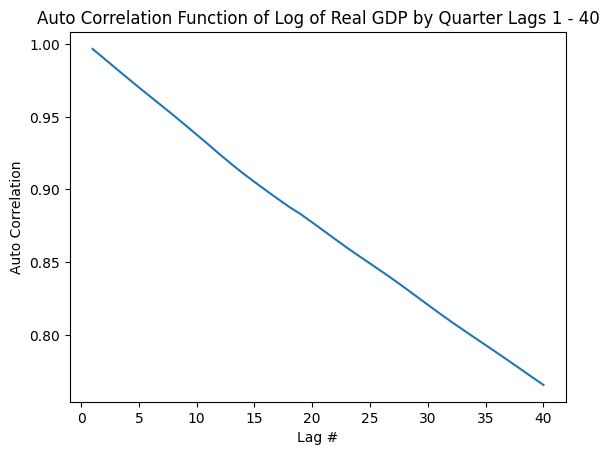

In [8]:
plt.plot(acf_df['lag'], acf_df['auto_corr'])
plt.xlabel('Lag #')
plt.ylabel('Auto Correlation')
plt.title('Auto Correlation Function of Log of Real GDP by Quarter Lags 1 - 40')
plt.show()

2B

In [9]:
gdp_log_lag = gdp_log.copy()
gdp_log_lag['GDPC1_log_lag_1'] = gdp_log_lag['GDPC1_log'].shift(1)
gdp_log_lag = gdp_log_lag.dropna()
print(gdp_log_lag.head())
print(gdp_log_lag.tail())

  observation_date  GDPC1_log  GDPC1_log_lag_1
1       1947-04-01   7.685653         7.688309
2       1947-07-01   7.683603         7.685653
3       1947-10-01   7.699141         7.683603
4       1948-01-01   7.714089         7.699141
5       1948-04-01   7.730478         7.714089
    observation_date  GDPC1_log  GDPC1_log_lag_1
307       2023-10-01  10.041535        10.033679
308       2024-01-01  10.045575        10.041535
309       2024-04-01  10.052937        10.045575
310       2024-07-01  10.060504        10.052937
311       2024-10-01  10.066070        10.060504


In [10]:
#without de-meaning
import statsmodels.api as sm

X = gdp_log_lag['GDPC1_log_lag_1']
Y = gdp_log_lag['GDPC1_log']

model_ar_one = sm.OLS(Y, X).fit()

print(model_ar_one.summary())

                                 OLS Regression Results                                
Dep. Variable:              GDPC1_log   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          2.008e+08
Date:                Tue, 11 Feb 2025   Prob (F-statistic):                        0.00
Time:                        20:29:06   Log-Likelihood:                          954.89
No. Observations:                 311   AIC:                                     -1908.
Df Residuals:                     310   BIC:                                     -1904.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [11]:
X = gdp_log_lag['GDPC1_log_lag_1']
X = sm.add_constant(X)  #this de-means
Y = gdp_log_lag['GDPC1_log']

model_ar_one_demeaned = sm.OLS(Y, X).fit()

print(model_ar_one_demeaned.summary())

                            OLS Regression Results                            
Dep. Variable:              GDPC1_log   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.216e+06
Date:                Tue, 11 Feb 2025   Prob (F-statistic):               0.00
Time:                        20:29:06   Log-Likelihood:                 960.44
No. Observations:                 311   AIC:                            -1917.
Df Residuals:                     309   BIC:                            -1909.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0274      0.008     

2C

In [12]:
gdp_log = gdp_log.set_index('observation_date')
gdp_log = gdp_log.sort_index()
gdp_log['time'] = np.arange(1, len(gdp_log) + 1)
print(gdp_log.head())

                  GDPC1_log  time
observation_date                 
1947-01-01         7.688309     1
1947-04-01         7.685653     2
1947-07-01         7.683603     3
1947-10-01         7.699141     4
1948-01-01         7.714089     5


In [13]:
X = gdp_log['time']
X = sm.add_constant(X)
Y = gdp_log['GDPC1_log']

model_detrend = sm.OLS(Y, X).fit()
gdp_log['detrended_log_GDP'] = model_detrend.resid

print(model_detrend.summary())

                            OLS Regression Results                            
Dep. Variable:              GDPC1_log   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                 2.630e+04
Date:                Tue, 11 Feb 2025   Prob (F-statistic):          8.80e-302
Time:                        20:29:06   Log-Likelihood:                 365.37
No. Observations:                 312   AIC:                            -726.7
Df Residuals:                     310   BIC:                            -719.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.8059      0.009    913.791      0.0

In [14]:
detrend_gamma_0 = np.var(gdp_log['detrended_log_GDP'], ddof=0)
print(detrend_gamma_0)
detrend_gamma_1 = gdp_log['detrended_log_GDP'].dropna().cov(gdp_log['detrended_log_GDP'].shift(1).dropna())
print(detrend_gamma_1)
detrend_auto_corr_1 = detrend_gamma_1/detrend_gamma_0
print(detrend_auto_corr_1)


0.005628114864540791
0.005548060560631897
0.9857760003419145


In [15]:
acf_data_detrend = {'lag': [], 'auto_corr': []}

for lag in range(1, 41):
    detrend_gamma_k = gdp_log['detrended_log_GDP'].dropna().cov(gdp_log['detrended_log_GDP'].shift(lag).dropna())
    auto_corr_k = detrend_gamma_k / detrend_gamma_0
    acf_data_detrend['lag'].append(lag)
    acf_data_detrend['auto_corr'].append(auto_corr_k)

detrend_acf_df = pd.DataFrame(acf_data_detrend)

print(detrend_acf_df.head())
print(detrend_acf_df.tail())

   lag  auto_corr
0    1   0.985776
1    2   0.964646
2    3   0.940146
3    4   0.916142
4    5   0.894043
    lag  auto_corr
35   36   0.349260
36   37   0.333210
37   38   0.317594
38   39   0.302663
39   40   0.290104


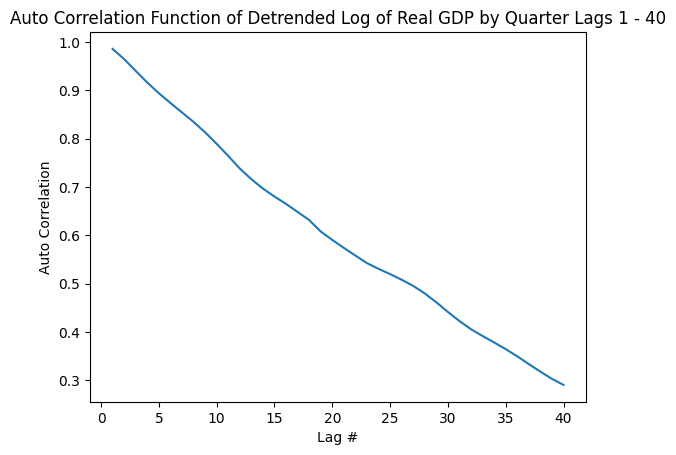

In [16]:
plt.plot(detrend_acf_df['lag'], detrend_acf_df['auto_corr'])
plt.xlabel('Lag #')
plt.ylabel('Auto Correlation')
plt.title('Auto Correlation Function of Detrended Log of Real GDP by Quarter Lags 1 - 40')
plt.show()

In [17]:
detrend_gdp_log_lag = gdp_log.copy()
detrend_gdp_log_lag['detrended_log_GDP_lag_1'] = detrend_gdp_log_lag['detrended_log_GDP'].shift(1)
detrend_gdp_log_lag = detrend_gdp_log_lag.dropna()
detrend_gdp_log_lag = detrend_gdp_log_lag[['detrended_log_GDP', 'detrended_log_GDP_lag_1']]
print(detrend_gdp_log_lag.head())
print(detrend_gdp_log_lag.tail())

                  detrended_log_GDP  detrended_log_GDP_lag_1
observation_date                                            
1947-04-01                -0.135579                -0.125251
1947-07-01                -0.145302                -0.135579
1947-10-01                -0.137435                -0.145302
1948-01-01                -0.130159                -0.137435
1948-04-01                -0.121442                -0.130159
                  detrended_log_GDP  detrended_log_GDP_lag_1
observation_date                                            
2023-10-01                -0.127255                -0.127439
2024-01-01                -0.130887                -0.127255
2024-04-01                -0.131196                -0.130887
2024-07-01                -0.131302                -0.131196
2024-10-01                -0.133407                -0.131302


In [18]:
X = detrend_gdp_log_lag['detrended_log_GDP_lag_1']
X = sm.add_constant(X)  #this de-means
Y = detrend_gdp_log_lag['detrended_log_GDP']

model_ar_one_detrend = sm.OLS(Y, X).fit()

print(model_ar_one_detrend.summary())

                            OLS Regression Results                            
Dep. Variable:      detrended_log_GDP   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                 1.371e+04
Date:                Tue, 11 Feb 2025   Prob (F-statistic):          5.02e-258
Time:                        20:29:06   Log-Likelihood:                 958.28
No. Observations:                 311   AIC:                            -1913.
Df Residuals:                     309   BIC:                            -1905.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -2

In [19]:
def compute_partial_autocorrelations(df, max_lags, target_col):
    df_sorted = df.sort_values("time").copy()
    results = []

    for lag in range(1, max_lags + 1):
        df_lag = df_sorted.copy()

        # Create lag columns for each lag from 1 to the current lag
        for i in range(1, lag + 1):
            df_lag[f'lag_{i}'] = df_lag[target_col].shift(i)

        # Drop rows with missing values (which appear because of the shifting)
        cols_to_check = [f'lag_{i}' for i in range(1, lag + 1)] + [target_col]
        df_reg = df_lag.dropna(subset=cols_to_check)

        # Prepare the regression variables
        X = df_reg[[f'lag_{i}' for i in range(1, lag + 1)]]
        X = sm.add_constant(X)  # adds an intercept term
        y = df_reg[target_col]

        # Run OLS regression
        model = sm.OLS(y, X).fit()

        # Extract the coefficient for the current (last) lag variable
        partial_auto_corr = model.params[f'lag_{lag}']

        # Append the results for this lag
        results.append({'lag': lag, 'partial_auto_corr': partial_auto_corr})

    # Return the results as a dataframe
    return pd.DataFrame(results)


In [20]:
pacf_df = compute_partial_autocorrelations(gdp_log, 40, 'detrended_log_GDP')
print(pacf_df.head())

   lag  partial_auto_corr
0    1           0.989518
1    2          -0.138867
2    3          -0.104392
3    4           0.023268
4    5           0.058901


In [21]:
standard_error = 1/ np.sqrt(len(gdp_log))
print(standard_error)
ci = 1.96 * standard_error

0.05661385170722978


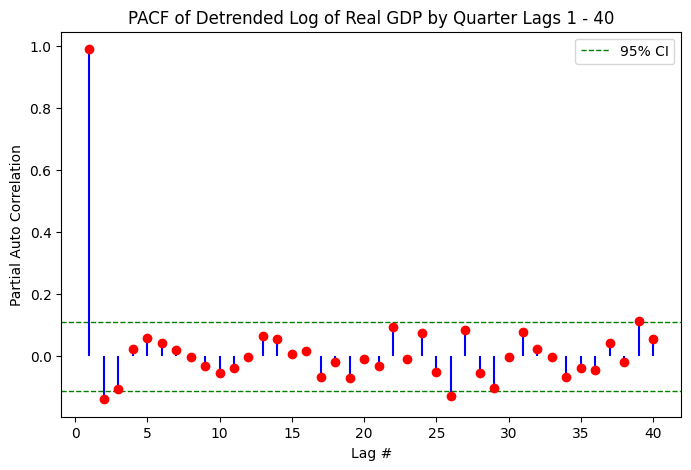

In [22]:
lags = pacf_df['lag']
values = pacf_df['partial_auto_corr']

plt.figure(figsize=(8, 5))

plt.axhline(y=ci, color='green', linestyle='--', linewidth=1, label='95% CI')
plt.axhline(y=-ci, color='green', linestyle='--', linewidth=1)

plt.vlines(x=lags, ymin=0, ymax=values, color='blue', linestyle='solid')
plt.scatter(lags, values, color='red', zorder=3)

plt.xlabel('Lag #')
plt.ylabel('Partial Auto Correlation')
plt.title('PACF of Detrended Log of Real GDP by Quarter Lags 1 - 40')
plt.legend()
plt.show()


2D

In [23]:
gdp_log_first_difference = gdp_log.copy()
gdp_log_first_difference['gdp_log_first_difference'] = gdp_log_first_difference['GDPC1_log'].diff()
gdp_log_first_difference = gdp_log_first_difference.dropna()
gdp_log_first_difference = gdp_log_first_difference[['gdp_log_first_difference', 'time']]
print(gdp_log_first_difference.head())
print(gdp_log_first_difference.tail())


                  gdp_log_first_difference  time
observation_date                                
1947-04-01                       -0.002656     2
1947-07-01                       -0.002051     3
1947-10-01                        0.015539     4
1948-01-01                        0.014948     5
1948-04-01                        0.016389     6
                  gdp_log_first_difference  time
observation_date                                
2023-10-01                        0.007856   308
2024-01-01                        0.004040   309
2024-04-01                        0.007363   310
2024-07-01                        0.007566   311
2024-10-01                        0.005566   312


In [24]:
fdiff_gamma_0 = np.var(gdp_log_first_difference['gdp_log_first_difference'], ddof=0)

fdiff_acf_data = {'lag': [], 'auto_corr': []}

for lag in range(1, 41):
    fdiff_gamma_k = gdp_log_first_difference['gdp_log_first_difference'].dropna().cov(gdp_log_first_difference['gdp_log_first_difference'].shift(lag).dropna())
    auto_corr_k = fdiff_gamma_k / fdiff_gamma_0
    fdiff_acf_data['lag'].append(lag)
    fdiff_acf_data['auto_corr'].append(auto_corr_k)

fdiff_acf_df = pd.DataFrame(acf_data)

print(fdiff_acf_df.head())
print(fdiff_acf_df.tail())


   lag  auto_corr
0    1   0.996742
1    2   0.990147
2    3   0.983454
3    4   0.976846
4    5   0.970310
    lag  auto_corr
35   36   0.787521
36   37   0.782036
37   38   0.776537
38   39   0.770969
39   40   0.765509


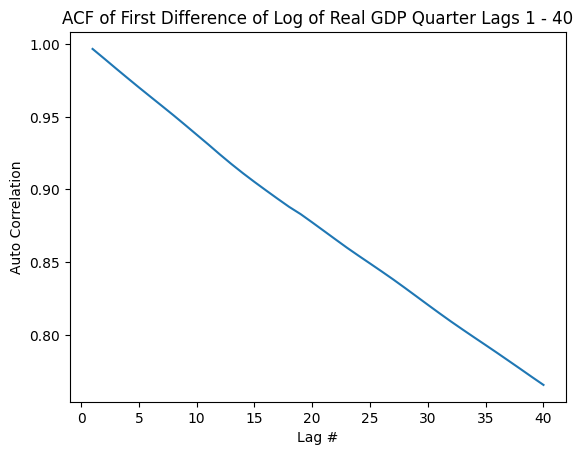

In [25]:
plt.plot(fdiff_acf_df['lag'], fdiff_acf_df['auto_corr'])
plt.xlabel('Lag #')
plt.ylabel('Auto Correlation')
plt.title('ACF of First Difference of Log of Real GDP Quarter Lags 1 - 40')
plt.show()

In [26]:
fdiff_pacf_df = compute_partial_autocorrelations(gdp_log_first_difference, 40, 'gdp_log_first_difference')
print(fdiff_pacf_df.head())

   lag  partial_auto_corr
0    1           0.132130
1    2           0.095337
2    3          -0.032637
3    4          -0.067002
4    5          -0.049056


0.05670479771237427


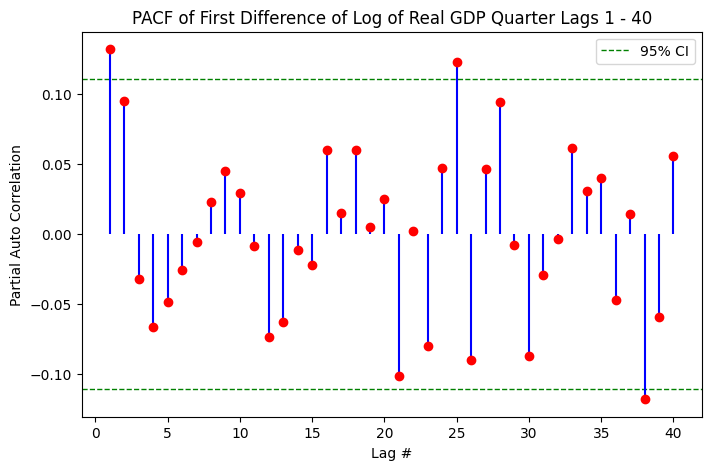

In [27]:
lags = fdiff_pacf_df['lag']
values = fdiff_pacf_df['partial_auto_corr']

standard_error = 1/ np.sqrt(len(gdp_log_first_difference))
print(standard_error)
ci = 1.96 * standard_error

plt.figure(figsize=(8, 5))

plt.axhline(y=ci, color='green', linestyle='--', linewidth=1, label='95% CI')
plt.axhline(y=-ci, color='green', linestyle='--', linewidth=1)

plt.vlines(x=lags, ymin=0, ymax=values, color='blue', linestyle='solid')
plt.scatter(lags, values, color='red', zorder=3)

plt.xlabel('Lag #')
plt.ylabel('Partial Auto Correlation')
plt.title('PACF of First Difference of Log of Real GDP Quarter Lags 1 - 40')
plt.legend()
plt.show()


# **Question 3**

3A

In [28]:
treasury_raw['observation_date'] = pd.to_datetime(treasury_raw['observation_date'])
treasury_raw.set_index('observation_date', inplace=True)
filtered_treasury = treasury_raw.loc[:'2000-12-31']
print(filtered_treasury.head())
print(filtered_treasury.tail())

                  DGS10
observation_date       
1962-01-02         4.06
1962-01-03         4.03
1962-01-04         3.99
1962-01-05         4.02
1962-01-08         4.03
                  DGS10
observation_date       
2000-12-25          NaN
2000-12-26         5.04
2000-12-27         5.11
2000-12-28         5.13
2000-12-29         5.12


In [29]:
filtered_treasury_lag_1 = filtered_treasury.copy()

filtered_treasury_lag_1['DGS10_lag_1'] = filtered_treasury_lag_1['DGS10'].shift(1)
filtered_treasury_lag_2 = filtered_treasury_lag_1.copy()
filtered_treasury_lag_2['DGS10_lag_2'] = filtered_treasury_lag_1['DGS10'].shift(2)

filtered_treasury_lag_1 = filtered_treasury_lag_1.dropna()
print(filtered_treasury_lag_1.head())
print(filtered_treasury_lag_1.tail())

filtered_treasury_lag_2 = filtered_treasury_lag_2.dropna()
print(filtered_treasury_lag_2.head())
print(filtered_treasury_lag_2.tail())

                  DGS10  DGS10_lag_1
observation_date                    
1962-01-03         4.03         4.06
1962-01-04         3.99         4.03
1962-01-05         4.02         3.99
1962-01-08         4.03         4.02
1962-01-09         4.05         4.03
                  DGS10  DGS10_lag_1
observation_date                    
2000-12-21         5.03         5.08
2000-12-22         5.02         5.03
2000-12-27         5.11         5.04
2000-12-28         5.13         5.11
2000-12-29         5.12         5.13
                  DGS10  DGS10_lag_1  DGS10_lag_2
observation_date                                 
1962-01-04         3.99         4.03         4.06
1962-01-05         4.02         3.99         4.03
1962-01-08         4.03         4.02         3.99
1962-01-09         4.05         4.03         4.02
1962-01-10         4.07         4.05         4.03
                  DGS10  DGS10_lag_1  DGS10_lag_2
observation_date                                 
2000-12-20         5.08         

In [30]:
X = filtered_treasury_lag_1['DGS10_lag_1']
X = sm.add_constant(X)  #this de-means
Y = filtered_treasury_lag_1['DGS10']

model_ar_one_treasury = sm.OLS(Y, X).fit()
filtered_treasury_lag_1['residuals'] = model_ar_one_treasury.resid
print(model_ar_one_treasury.summary())

                            OLS Regression Results                            
Dep. Variable:                  DGS10   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.242e+07
Date:                Tue, 11 Feb 2025   Prob (F-statistic):               0.00
Time:                        20:29:09   Log-Likelihood:                 11850.
No. Observations:                9295   AIC:                        -2.370e+04
Df Residuals:                    9293   BIC:                        -2.368e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0031      0.002      1.385      

In [31]:
X = filtered_treasury_lag_2[['DGS10_lag_1', 'DGS10_lag_2']]
X = sm.add_constant(X)  #this de-means
Y = filtered_treasury_lag_2['DGS10']

model_ar_two_treasury = sm.OLS(Y, X).fit()
filtered_treasury_lag_2['residuals'] = model_ar_two_treasury.resid

print(model_ar_two_treasury.summary())

                            OLS Regression Results                            
Dep. Variable:                  DGS10   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 5.931e+06
Date:                Tue, 11 Feb 2025   Prob (F-statistic):               0.00
Time:                        20:29:09   Log-Likelihood:                 11308.
No. Observations:                8860   AIC:                        -2.261e+04
Df Residuals:                    8857   BIC:                        -2.259e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0043      0.002      1.878      

In [32]:
filtered_treasury_lag_1.shape

(9295, 3)

In [33]:
filtered_treasury_lag_1_gamma_0 = np.var(filtered_treasury_lag_1['residuals'], ddof=0)

treasury_lag_1_acf_data = {'lag': [], 'auto_corr': []}

for lag in range(1, 21):
    filtered_treasury_lag_1_gamma_k = filtered_treasury_lag_1['residuals'].dropna().cov(filtered_treasury_lag_1['residuals'].shift(lag).dropna())
    auto_corr_k = filtered_treasury_lag_1_gamma_k / filtered_treasury_lag_1_gamma_0
    treasury_lag_1_acf_data['lag'].append(lag)
    treasury_lag_1_acf_data['auto_corr'].append(auto_corr_k)

treasury_lag_1_acf_df = pd.DataFrame(treasury_lag_1_acf_data)

print(treasury_lag_1_acf_df.head())
print(treasury_lag_1_acf_df.tail())


   lag  auto_corr
0    1   0.087128
1    2   0.027298
2    3  -0.011124
3    4  -0.025702
4    5   0.034552
    lag  auto_corr
15   16  -0.007686
16   17   0.006356
17   18  -0.005817
18   19   0.027179
19   20  -0.003282


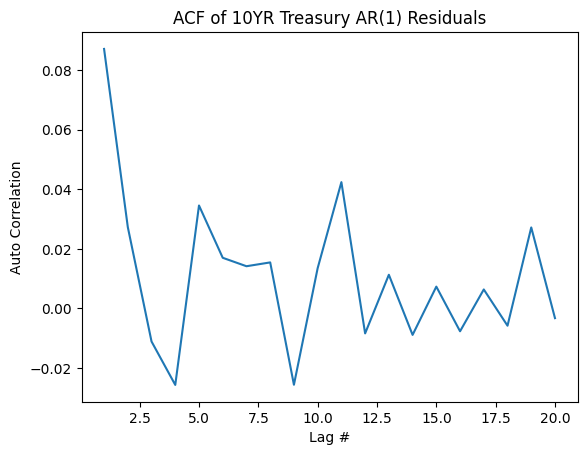

In [34]:
plt.plot(treasury_lag_1_acf_df['lag'], treasury_lag_1_acf_df['auto_corr'])
plt.xlabel('Lag #')
plt.ylabel('Auto Correlation')
plt.title('ACF of 10YR Treasury AR(1) Residuals')
plt.show()

In [35]:
import scipy.stats as stats

h = 20
n = filtered_treasury_lag_1.shape[0]

df_h = treasury_lag_1_acf_df[treasury_lag_1_acf_df['lag'] <= h]

Q = n * (n + 2) * np.sum((df_h['auto_corr']**2) / (n - df_h['lag']))

dof = h
p_value = 1 - stats.chi2.cdf(Q, dof)

print(f"Ljung-Box Q statistic: {Q:.2f}, with a p-value of {p_value:.4f}")


Ljung-Box Q statistic: 138.53, with a p-value of 0.0000


In [36]:
filtered_treasury_lag_2_gamma_0 = np.var(filtered_treasury_lag_2['residuals'], ddof=0)

treasury_lag_2_acf_data = {'lag': [], 'auto_corr': []}

for lag in range(1, 21):
    filtered_treasury_lag_2_gamma_k = filtered_treasury_lag_2['residuals'].dropna().cov(filtered_treasury_lag_2['residuals'].shift(lag).dropna())
    auto_corr_k = filtered_treasury_lag_2_gamma_k / filtered_treasury_lag_2_gamma_0
    treasury_lag_2_acf_data['lag'].append(lag)
    treasury_lag_2_acf_data['auto_corr'].append(auto_corr_k)

treasury_lag_2_acf_df = pd.DataFrame(treasury_lag_2_acf_data)

print(treasury_lag_2_acf_df.head())
print(treasury_lag_2_acf_df.tail())


   lag  auto_corr
0    1   0.005242
1    2   0.017849
2    3  -0.005247
3    4  -0.016874
4    5   0.046945
    lag  auto_corr
15   16  -0.024911
16   17  -0.007422
17   18   0.012764
18   19   0.018038
19   20   0.032264


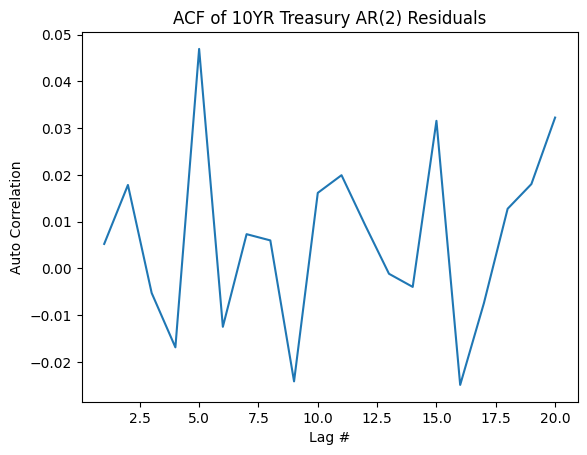

In [37]:
plt.plot(treasury_lag_2_acf_df['lag'], treasury_lag_2_acf_df['auto_corr'])
plt.xlabel('Lag #')
plt.ylabel('Auto Correlation')
plt.title('ACF of 10YR Treasury AR(2) Residuals')
plt.show()

In [38]:
import scipy.stats as stats

h = 20
n = filtered_treasury_lag_2.shape[0]

df_h = treasury_lag_2_acf_df[treasury_lag_2_acf_df['lag'] <= h]

Q = n * (n + 2) * np.sum((df_h['auto_corr']**2) / (n - df_h['lag']))

dof = h
p_value = 1 - stats.chi2.cdf(Q, dof)

print(f"Ljung-Box Q statistic: {Q:.2f}, with a p-value of {p_value:.4f}")

Ljung-Box Q statistic: 67.90, with a p-value of 0.0000


3C

In [49]:
filtered_treasury_lag_1_early = filtered_treasury_lag_1.loc[:'1979-12-31']
filtered_treasury_lag_1_late = filtered_treasury_lag_1.loc['1980-01-01':]
filtered_treasury_lag_1_early = filtered_treasury_lag_1_early.drop(columns = 'residuals')
filtered_treasury_lag_1_late = filtered_treasury_lag_1_late.drop(columns = 'residuals')

In [44]:
X = filtered_treasury_lag_1_early['DGS10_lag_1']
X = sm.add_constant(X)  #this de-means
Y = filtered_treasury_lag_1_early['DGS10']

model_ar_one_treasury_early = sm.OLS(Y, X).fit()
filtered_treasury_lag_1_early['residuals'] = model_ar_one_treasury_early.resid
print(model_ar_one_treasury_early.summary())

                            OLS Regression Results                            
Dep. Variable:                  DGS10   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 8.235e+06
Date:                Tue, 11 Feb 2025   Prob (F-statistic):               0.00
Time:                        20:35:57   Log-Likelihood:                 8001.3
No. Observations:                4275   AIC:                        -1.600e+04
Df Residuals:                    4273   BIC:                        -1.599e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0008      0.002      0.354      

In [45]:
X = filtered_treasury_lag_1_late['DGS10_lag_1']
X = sm.add_constant(X)  #this de-means
Y = filtered_treasury_lag_1_late['DGS10']

model_ar_one_treasury_late = sm.OLS(Y, X).fit()
filtered_treasury_lag_1_late['residuals'] = model_ar_one_treasury_late.resid
print(model_ar_one_treasury_late.summary())

                            OLS Regression Results                            
Dep. Variable:                  DGS10   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.717e+06
Date:                Tue, 11 Feb 2025   Prob (F-statistic):               0.00
Time:                        20:35:57   Log-Likelihood:                 5231.5
No. Observations:                5020   AIC:                        -1.046e+04
Df Residuals:                    5018   BIC:                        -1.045e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0016      0.004      0.383      

In [48]:
ssr_pooled_ar1 = np.sum(filtered_treasury_lag_1['residuals']**2)
ssr_early_ar1 = np.sum(filtered_treasury_lag_1_early['residuals']**2)
ssr_late_ar1 = np.sum(filtered_treasury_lag_1_late['residuals']**2)

n_total = filtered_treasury_lag_1.shape[0]

n_early = filtered_treasury_lag_1_early.shape[0]
n_late = filtered_treasury_lag_1_late.shape[0]

k = 2

numerator = (ssr_pooled_ar1 - (ssr_early_ar1 + ssr_late_ar1)) / k
denom_df = (n_early + n_late - 2 * k)
denom = (ssr_early_ar1 + ssr_late_ar1) / denom_df

F_stat_ar1 = numerator / denom

print("Chow Test F-statistic AR1:", F_stat_ar1)

from scipy.stats import f
p_value = f.sf(F_stat_ar1, k, denom_df)
print("p-value:", p_value)


Chow Test F-statistic AR1: 1.1271007951743948
p-value: 0.32401544728273934


In [50]:
filtered_treasury_lag_2_early = filtered_treasury_lag_2.loc[:'1979-12-31']
filtered_treasury_lag_2_late = filtered_treasury_lag_2.loc['1980-01-01':]
filtered_treasury_lag_2_early = filtered_treasury_lag_2_early.drop(columns = 'residuals')
filtered_treasury_lag_2_late = filtered_treasury_lag_2_late.drop(columns = 'residuals')

In [51]:
X = filtered_treasury_lag_2_early[['DGS10_lag_1', 'DGS10_lag_2']]
X = sm.add_constant(X)  #this de-means
Y = filtered_treasury_lag_2_early['DGS10']

model_ar_two_treasury_early = sm.OLS(Y, X).fit()
filtered_treasury_lag_2_early['residuals'] = model_ar_two_treasury_early.resid
print(model_ar_two_treasury_early.summary())

                            OLS Regression Results                            
Dep. Variable:                  DGS10   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.032e+06
Date:                Tue, 11 Feb 2025   Prob (F-statistic):               0.00
Time:                        20:42:26   Log-Likelihood:                 7676.1
No. Observations:                4068   AIC:                        -1.535e+04
Df Residuals:                    4065   BIC:                        -1.533e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0020      0.002      0.850      

In [52]:
X = filtered_treasury_lag_2_late[['DGS10_lag_1', 'DGS10_lag_2']]
X = sm.add_constant(X)  #this de-means
Y = filtered_treasury_lag_2_late['DGS10']

model_ar_two_treasury_late = sm.OLS(Y, X).fit()
filtered_treasury_lag_2_late['residuals'] = model_ar_two_treasury_late.resid
print(model_ar_two_treasury_late.summary())

                            OLS Regression Results                            
Dep. Variable:                  DGS10   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 2.253e+06
Date:                Tue, 11 Feb 2025   Prob (F-statistic):               0.00
Time:                        20:42:57   Log-Likelihood:                 4996.0
No. Observations:                4792   AIC:                            -9986.
Df Residuals:                    4789   BIC:                            -9967.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0034      0.004      0.813      

In [53]:
ssr_pooled_ar2 = np.sum(filtered_treasury_lag_2['residuals']**2)
ssr_early_ar2 = np.sum(filtered_treasury_lag_2_early['residuals']**2)
ssr_late_ar2 = np.sum(filtered_treasury_lag_2_late['residuals']**2)

n_total = filtered_treasury_lag_2.shape[0]

n_early = filtered_treasury_lag_2_early.shape[0]
n_late = filtered_treasury_lag_2_late.shape[0]

k = 2

numerator = (ssr_pooled_ar2 - (ssr_early_ar2 + ssr_late_ar2)) / k
denom_df = (n_early + n_late - 2 * k)
denom = (ssr_early_ar2 + ssr_late_ar2) / denom_df

F_stat_ar2 = numerator / denom

print("Chow Test F-statistic AR2:", F_stat_ar2)

from scipy.stats import f
p_value = f.sf(F_stat_ar2, k, denom_df)
print("p-value:", p_value)


Chow Test F-statistic AR2: 6.4170279406361574
p-value: 0.0016411096155748027


3D

In [55]:
latest_dgs10 = filtered_treasury_lag_1['DGS10'].iloc[-1]

X_new_ar1 = pd.DataFrame({'const': [1], 'DGS10_lag_1': [latest_dgs10]})

pred_ar1 = model_ar_one_treasury.predict(X_new_ar1)
print(f"AR(1) Prediction for next period: {pred_ar1.iloc[0]}")


AR(1) Prediction for next period: 5.121048555564096


In [57]:
latest_dgs10 = filtered_treasury_lag_2['DGS10'].iloc[-1]
second_latest_dgs10 = filtered_treasury_lag_2['DGS10'].iloc[-2]

X_new_ar2 = pd.DataFrame({'const': [1], 'DGS10_lag_1': [latest_dgs10], 'DGS10_lag_2': [second_latest_dgs10]})

pred_ar2 = model_ar_two_treasury.predict(X_new_ar2)
print(f"AR(2) Prediction for next period: {pred_ar2.iloc[0]}")


AR(2) Prediction for next period: 5.120287432205826


In [58]:
rmse_ar1 = np.sqrt(np.mean(filtered_treasury_lag_1['residuals']**2))
print(f"AR(1) RMSE: {rmse_ar1}")


rmse_ar2 = np.sqrt(np.mean(filtered_treasury_lag_2['residuals']**2))
print(f"AR(2) RMSE: {rmse_ar2}")

AR(1) RMSE: 0.06761882372886982
AR(2) RMSE: 0.06752659353241201
